In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
data = pd.read_csv('us-states.csv')

In [4]:
dense = {
    'Alabama' : 95,
    'Alaska' : 1,
    'American Samoa' : 721,
    'Arizona' : 60,
    'Arkansas' : 57,
    'California' : 251,
    'Colorado' : 52,
    'Connecticut' : 741,
    'Delaware' : 485,
    'District of Columbia' : 11011,
    'Florida' : 378,
    'Georgia' : 177,
    'Guam' : 808,
    'Hawaii' : 222,
    'Idaho' : 20,
    'Illinois' : 231,
    'Indiana' : 184,
    'Iowa' : 55,
    'Kansas' : 36,
    'Kentucky' : 112,
    'Louisiana' : 108,
    'Maine' : 43,
    'Maryland' : 618,
    'Massachusetts' : 871,
    'Michigan' : 175,
    'Minnesota' : 68,
    'Mississippi' : 63,
    'Missouri' : 88,
    'Montana' : 7,
    'Nebraska' : 24,
    'Nevada' : 26,
    'New Hampshire' : 148,
    'New Jersey' : 1218,
    'New Mexico' : 17,
    'New York' : 420,
    'North Carolina' : 206,
    'North Dakota' : 10,
    'Northern Mariana Islands' : 307,
    'Ohio' : 284,
    'Oklahoma' : 57,
    'Oregon' : 41,
    'Pennsylvania' : 286,
    'Puerto Rico' : 1046,
    'Rhode Island' : 1021,
    'South Carolina' : 162,
    'South Dakota' : 11,
    'Tennessee' : 160,
    'Texas' : 105,
    'Utah' : 36,
    'Vermont' : 67,
    'Virgin Islands' : 799,
    'Virginia' : 212,
    'Washington' : 107,
    'West Virginia' : 76,
    'Wisconsin' : 106,
    'Wyoming' : 6
}

age = {
    'Alabama' : 39.2,
    'Alaska' : 34.6,
    'American Samoa' : 25.5,
    'Arizona' : 37.9,
    'Arkansas' : 38.3,
    'California' : 36.8,
    'Colorado' : 36.9,
    'Connecticut' : 41.0,
    'Delaware' : 40.7,
    'District of Columbia' : 34.0,
    'Florida' : 42.2,
    'Georgia' : 36.9,
    'Guam' : 29.0,
    'Hawaii' : 39.2,
    'Idaho' : 36.6,
    'Illinois' : 38.3,
    'Indiana' : 37.9,
    'Iowa' : 38.2,
    'Kansas' : 36.9,
    'Kentucky' : 38.9,
    'Louisiana' : 37.2,
    'Maine' : 44.9,
    'Maryland' : 38.8,
    'Massachusetts' : 39.4,
    'Michigan' : 39.8,
    'Minnesota' : 38.1,
    'Mississippi' : 37.7,
    'Missouri' : 38.7,
    'Montana' : 39.9,
    'Nebraska' : 36.6,
    'Nevada' : 38.1,
    'New Hampshire' : 43.0,
    'New Jersey' : 40.0,
    'New Mexico' : 38.1,
    'New York' : 39.0,
    'North Carolina' : 38.9,
    'North Dakota' : 35.2,
    'Northern Mariana Islands' : 33.6,
    'Ohio' : 39.4,
    'Oklahoma' : 36.7,
    'Oregon' : 39.4,
    'Pennsylvania' : 40.8,
    'Puerto Rico' : 41.5,
    'Rhode Island' : 40.1,
    'South Carolina' : 39.6,
    'South Dakota' : 37.1,
    'Tennessee' : 38.8,
    'Texas' : 34.8,
    'Utah' : 31.0,
    'Vermont' : 42.8,
    'Virgin Islands' : 41.0,
    'Virginia' : 38.4,
    'Washington' : 37.7,
    'West Virginia' : 42.7,
    'Wisconsin' : 39.6,
    'Wyoming' : 38.0
}

gdpPerCap = {
    'Alabama' : 45219,
    'Alaska' : 73205,
    'American Samoa' : 11467,
    'Arizona' : 48055,
    'Arkansas' : 42454,
    'California' : 74205,
    'Colorado' : 63882,
    'Connecticut' : 76342,
    'Delaware' : 77253,
    'District of Columbia' : 200277,
    'Florida' : 48318,
    'Georgia' : 55832,
    'Guam' : 35713,
    'Hawaii' : 64096,
    'Idaho' : 43430,
    'Illinois' : 67268,
    'Indiana' : 55172,
    'Iowa' : 59977,
    'Kansas' : 56334,
    'Kentucky' : 36898,
    'Louisiana' : 53589,
    'Maine' : 47969,
    'Maryland' : 68573,
    'Massachusetts' : 82480,
    'Michigan' : 53209,
    'Minnesota' : 64675,
    'Mississippi' : 37948,
    'Missouri' : 51699,
    'Montana' : 46609,
    'Nebraska' : 63942,
    'Nevada' : 55269,
    'New Hampshire' : 63067,
    'New Jersey' : 69378,
    'New Mexico' : 46954,
    'New York' : 85746,
    'North Carolina' : 54441,
    'North Dakota' : 72597,
    'Northern Mariana Islands' : 23259,
    'Ohio' : 57492,
    'Oklahoma' : 50613,
    'Oregon' : 56956,
    'Pennsylvania' : 61594,
    'Puerto Rico' : 31651,
    'Rhode Island' : 57852,
    'South Carolina' : 45280,
    'South Dakota' : 58624,
    'Tennessee' : 53933,
    'Texas' : 61167,
    'Utah' : 55550,
    'Vermont' : 53523,
    'Virgin Islands' : 35938,
    'Virginia' : 62563,
    'Washington' : 74182,
    'West Virginia' : 43053,
    'Wisconsin' : 57720,
    'Wyoming' : 69900
}

In [5]:
def seriesCreator(dataDict):
    seriesDict = pd.Series(dataDict)
    dataList = []
    for x in range (0, 2889):
        dataList.append(seriesDict[data['state'].iloc[x]])
    return pd.Series(dataList)

In [7]:
denseSeries = seriesCreator(dense)
ageSeries = seriesCreator(age)
gdpSeries = seriesCreator(gdpPerCap)

In [8]:
def seriesConcat(series):
    return pd.concat([data, series.reindex(data.index)], axis = 1)

In [9]:
data = seriesConcat(denseSeries)
data = seriesConcat(ageSeries)
data = seriesConcat(gdpSeries)

In [10]:
data.columns = ['date', 'state', 'fips', 'cases', 'deaths', 'pop_density', 'avg_age', 'gdp_per_capita']

In [11]:
data

,date,state,fips,cases,deaths,pop_density,avg_age,gdp_per_capita
0,2020-01-21,Washington,53,1,0,107,37.7,74182
1,2020-01-22,Washington,53,1,0,107,37.7,74182
2,2020-01-23,Washington,53,1,0,107,37.7,74182
3,2020-01-24,Illinois,17,1,0,231,38.3,67268
4,2020-01-24,Washington,53,1,0,107,37.7,74182
...,...,...,...,...,...,...,...,...
2884,2020-04-23,Virginia,51,11000,375,212,38.4,62563
2885,2020-04-23,Washington,53,12906,717,107,37.7,74182
2886,2020-04-23,West Virginia,54,981,31,76,42.7,43053
2887,2020-04-23,Wisconsin,55,5052,257,106,39.6,57720


In [15]:
data.head()

,date,state,fips,cases,deaths,pop_density,avg_age
0,2020-01-21,Washington,53,1,0,107,37.7
1,2020-01-22,Washington,53,1,0,107,37.7
2,2020-01-23,Washington,53,1,0,107,37.7
3,2020-01-24,Illinois,17,1,0,231,38.3
4,2020-01-24,Washington,53,1,0,107,37.7


In [16]:
data.shape

(2889, 7)

In [12]:
import datetime as dt 

In [13]:
#label encoder for dates
def scrub_date(date1):
    date_parts = date1.split('-')
    f_date = dt.date(int(date_parts[0]), int(date_parts[1]), int(date_parts[2]))
    delta = f_date - dt.date(2020, 1, 21)
    return delta.days

for i in range(len(data['date'])):
    data['date'][i] = scrub_date(data['date'][i])

/home/justin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [14]:
#label encoder for state
id = 1
state_dict = {}
for i in range(len(data['state'])):
    state = data['state'][i]
    if state not in state_dict:
        state_dict[state] = id
        id += 1
        data['state'][i] = state_dict[state]
    else:
        data['state'][i] = state_dict[state]
        

/home/justin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/home/justin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [15]:
data = data.drop('fips', axis = 1)

In [16]:
y = data.cases
X = data.drop('cases', axis = 1)

In [17]:
data

,date,state,cases,deaths,pop_density,avg_age,gdp_per_capita
0,0,1,1,0,107,37.7,74182
1,1,1,1,0,107,37.7,74182
2,2,1,1,0,107,37.7,74182
3,3,2,1,0,231,38.3,67268
4,3,1,1,0,107,37.7,74182
...,...,...,...,...,...,...,...
2884,93,33,11000,375,212,38.4,62563
2885,93,1,12906,717,107,37.7,74182
2886,93,54,981,31,76,42.7,43053
2887,93,6,5052,257,106,39.6,57720


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y)

In [19]:
from sklearn.ensemble import RandomForestRegressor

In [20]:
model = RandomForestRegressor(n_estimators = 100, random_state = 1)
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [21]:
preds = model.predict(X_valid)

In [22]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_valid, preds)

In [23]:
mae

338.02921161825725

In [29]:
data.describe()

,cases,deaths,pop_density,avg_age
count,2889.000000,2889.00000,2889.000000,2889.000000
mean,4734.918311,190.28972,420.761855,38.263621
std,18762.852274,967.45956,1407.884868,2.755086
min,0.000000,0.00000,1.000000,25.500000
25%,19.000000,0.00000,55.000000,36.900000
50%,365.000000,6.00000,108.000000,38.300000
75%,2331.000000,63.00000,284.000000,39.600000
max,263460.000000,15740.00000,11011.000000,44.900000


In [24]:
import tensorflow_probability as tfp

tfd = tfp.distributions

In [26]:
def build_tf_model():
    model = keras.Sequential([
        layers.Dense(64, activation = 'relu', input_shape=[len(X_train.keys())]),
        layers.Dense(64, activation = 'relu'),
        layers.Dense(64, activation = 'relu'),
        tfp.layers.DistributionLambda(lambda t: tfd.Normal(loc=t, scale=1)),
        layers.Dense(1)
    ])
    
    #optimizer = tf.keras.optimizers.RMSprop(0.001)
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
    
    model.compile(loss = 'mse', optimizer = optimizer, metrics = ['mae', 'mse'])
    
    return model 

tf_model = build_tf_model()

tf_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                448       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
distribution_lambda (Distrib ((None, 64), (None, 64))  0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 8,833
Trainable params: 8,833
Non-trainable params: 0
_________________________________________________________________


In [32]:
history = tf_model.fit(X_train, y_train, epochs = 20, verbose = 1)

Train on 2166 samples
Epoch 1/20
2166/2166 [==============================] - 1s 246us/sample - loss: 355402189.1413 - mae: 4768.2344 - mse: 355402144.0000
Epoch 2/20
2166/2166 [==============================] - 0s 209us/sample - loss: 169385242.2899 - mae: 3682.4856 - mse: 169385296.0000
Epoch 3/20
2166/2166 [==============================] - 0s 185us/sample - loss: 16755152.0794 - mae: 1753.3740 - mse: 16755155.0000
Epoch 4/20
2166/2166 [==============================] - 0s 137us/sample - loss: 13322258.4582 - mae: 1156.8405 - mse: 13322260.0000
Epoch 5/20
2166/2166 [==============================] - 0s 193us/sample - loss: 13252079.5210 - mae: 1146.5488 - mse: 13252079.0000
Epoch 6/20
2166/2166 [==============================] - 0s 162us/sample - loss: 13762134.7913 - mae: 1174.1606 - mse: 13762133.0000
Epoch 7/20
2166/2166 [==============================] - 0s 163us/sample - loss: 13309639.3952 - mae: 1121.4305 - mse: 13309640.0000
Epoch 8/20
2166/2166 [============================

In [43]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.head()

,loss,mae,mse,epoch
0,3.554022e+08,4768.234375,355402144.0,0
1,1.693852e+08,3682.485596,169385296.0,1
2,1.675515e+07,1753.374023,16755155.0,2
3,1.332226e+07,1156.840454,13322260.0,3
4,1.325208e+07,1146.548828,13252079.0,4


In [34]:
from matplotlib import pyplot as plt

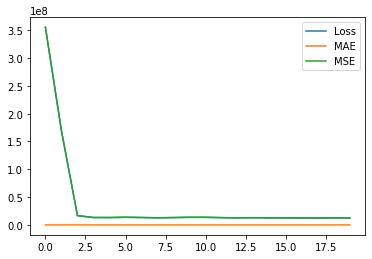

In [42]:
plt.figure()
plt.plot(hist['epoch'], hist['loss'], label = 'Loss')
plt.plot(hist['epoch'], hist['mae'], label = 'MAE')
plt.plot(hist['epoch'], hist['mse'], label = 'MSE')
plt.legend()

In [27]:
tf_model_2 = build_tf_model()

early_stop = keras.callbacks.EarlyStopping(monitor = 'mae', patience = 10)

early_history = tf_model_2.fit(X_train, y_train, epochs = 1000, verbose = 1)

Train on 2166 samples
Epoch 1/1000
2166/2166 [==============================] - 1s 288us/sample - loss: 345254109.4294 - mae: 6948.8931 - mse: 345254112.0000
Epoch 2/1000
2166/2166 [==============================] - 0s 162us/sample - loss: 337155329.9797 - mae: 6599.0708 - mse: 337155328.0000
Epoch 3/1000
2166/2166 [==============================] - 0s 222us/sample - loss: 323684844.9714 - mae: 6708.4390 - mse: 323684896.0000
Epoch 4/1000
2166/2166 [==============================] - 0s 159us/sample - loss: 294139637.6288 - mae: 6465.6602 - mse: 294139648.0000
Epoch 5/1000
2166/2166 [==============================] - 0s 170us/sample - loss: 239965355.7193 - mae: 6276.0508 - mse: 239965360.0000
Epoch 6/1000
2166/2166 [==============================] - 0s 167us/sample - loss: 145304162.5716 - mae: 5285.8711 - mse: 145304144.0000
Epoch 7/1000
2166/2166 [==============================] - 0s 144us/sample - loss: 53400983.0065 - mae: 3694.8865 - mse: 53400976.0000
Epoch 8/1000
2166/2166 [====

2166/2166 [==============================] - 0s 152us/sample - loss: 13221400.6676 - mae: 1768.7466 - mse: 13221403.0000
Epoch 60/1000
2166/2166 [==============================] - 0s 168us/sample - loss: 12860571.1884 - mae: 1621.2467 - mse: 12860572.0000
Epoch 61/1000
2166/2166 [==============================] - 0s 157us/sample - loss: 13624886.0175 - mae: 1783.2970 - mse: 13624887.0000
Epoch 62/1000
2166/2166 [==============================] - 0s 187us/sample - loss: 13706610.9584 - mae: 1891.7710 - mse: 13706613.0000
Epoch 63/1000
2166/2166 [==============================] - 0s 150us/sample - loss: 13800960.8204 - mae: 1941.9026 - mse: 13800961.0000
Epoch 64/1000
2166/2166 [==============================] - 0s 146us/sample - loss: 12864983.4977 - mae: 1684.4268 - mse: 12864986.0000
Epoch 65/1000
2166/2166 [==============================] - 0s 164us/sample - loss: 14149670.1297 - mae: 1980.8850 - mse: 14149667.0000
Epoch 66/1000
2166/2166 [==============================] - 0s 168us/s

KeyboardInterrupt: 